In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
class NaiveBayes:
    def __init__(self):
        self.probabilities_vector = pd.Series(dtype=np.float64)
        self.probabilities_table = None

    def fit(self, X: pd.DataFrame, y: pd.Series) -> None:
        _data = pd.DataFrame()
        _data_length = len(X)
        for _category in y.unique():
            temp_data = pd.DataFrame({'answer': [], 'variable': [], 'value': [], 'probability': []})

            _filter_vector = y == _category
            self.probabilities_vector[_category] = np.sum(_filter_vector) / _data_length
            _filtered_length = sum(_filter_vector)
            for _variable in X.columns:
                for _value in X[_variable].unique():
                    _probability = len(X[_filter_vector & (X[_variable] == _value)]) / _filtered_length
                    if _probability == 0:
                        _probability = 1 / (len(X[_variable].unique()) + _filtered_length)
                    temp_data = pd.concat([temp_data, pd.DataFrame({
                            'answer': [_category],
                            'variable': [_variable],
                            'value': [_value],
                            'probability': [_probability]
                        })])

            _data = pd.concat([_data, temp_data])
        self.probabilities_table = _data.pivot_table(columns='answer', index=['variable', 'value'], values='probability')

    def predict(self, X: pd.DataFrame) -> pd.Series:
        result = []
        for _, row in X.iterrows():
            scores = {k: v for k, v in self.probabilities_vector.items()}
            for column, value in row.items():
                for category in scores.keys():
                    scores[category] *= self.probabilities_table.loc[(column, value), category]
            result.append(sorted(scores.items(), key=lambda x: x[1], reverse=True)[0][0])
        return pd.Series(result)

In [126]:
train_set = pd.read_csv('data/bayes_trainingset.csv', header=None)
train_set.columns = ['outlook', 'windy', 'temperature', 'humidity', 'play']

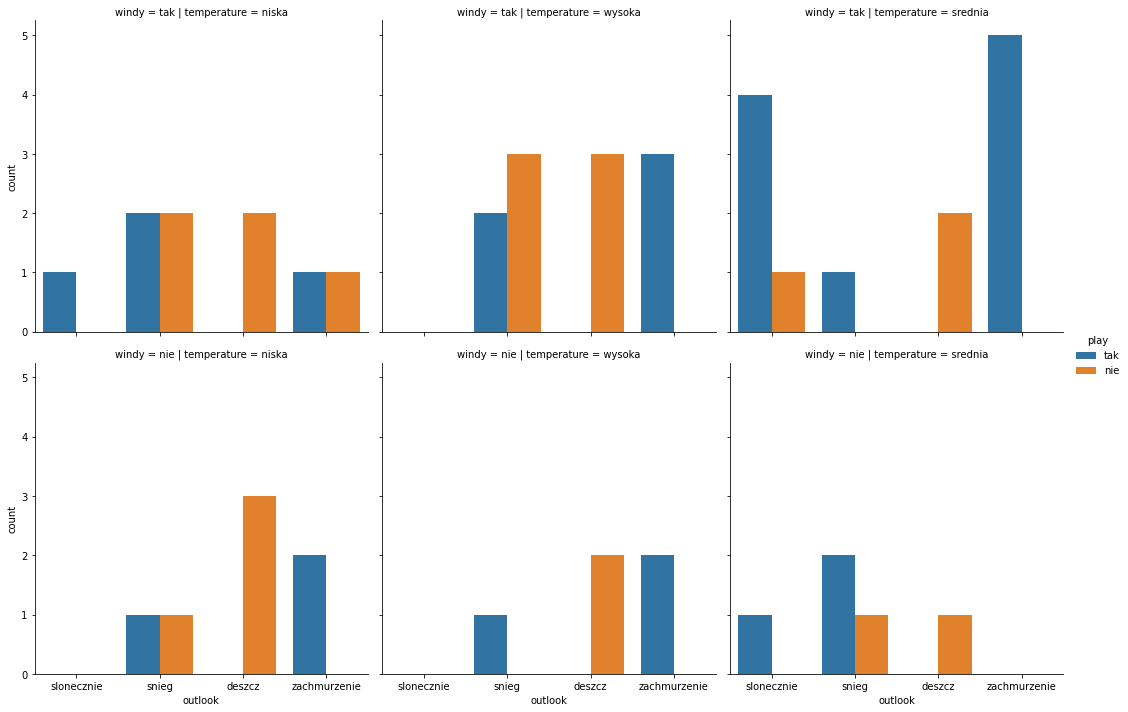

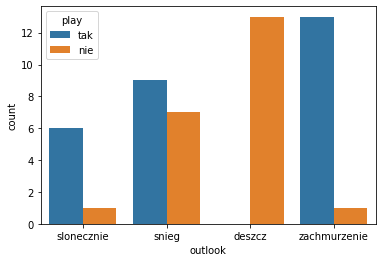

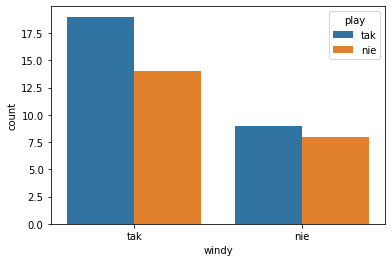

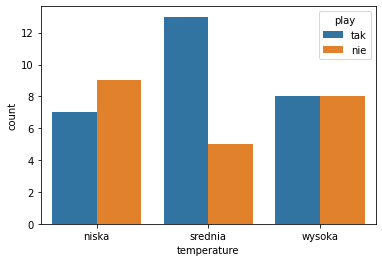

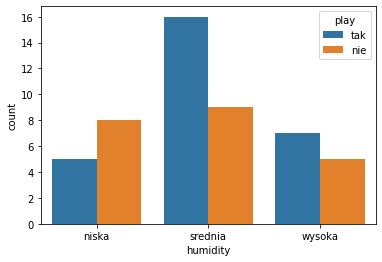

In [127]:
sns.catplot(data=train_set, x='outlook', hue='play', col='temperature', row='windy', kind='count')
plt.show()
sns.countplot(data=train_set, x='outlook', hue='play')
plt.show()
sns.countplot(data=train_set, x='windy', hue='play')
plt.show()
sns.countplot(data=train_set, x='temperature', hue='play', order=['niska', 'srednia', 'wysoka'])
plt.show()
sns.countplot(data=train_set, x='humidity', hue='play', order=['niska', 'srednia', 'wysoka'])
plt.show()

In [ ]:
model = NaiveBayes()
model.fit(train_set.iloc[:, :-1], train_set.iloc[:, -1])

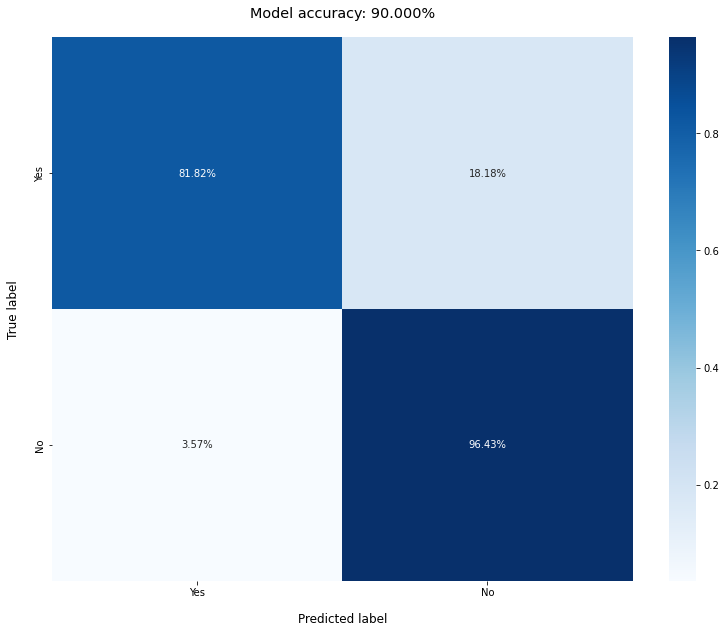

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

y_true = train_set.play
y_predicted = model.predict(train_set.iloc[:, :-1])

cm = confusion_matrix(y_true, y_predicted, normalize='true')
acc = accuracy_score(y_true, y_predicted)

cmdf = pd.DataFrame(cm)
cmdf.columns = cmdf.index = ["Yes", "No"]


fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
sns.heatmap(cmdf, annot=True, fmt='.2%', cmap='Blues', ax=ax)
plt.title(f'Model accuracy: {acc:.3%}', fontsize='x-large', y=1.025)
plt.xlabel('Predicted label', fontsize='large', labelpad=15)
plt.ylabel('True label', fontsize='large', labelpad=15)
# plt.savefig('figures/confusion-matrix.jpg')
plt.show()

In [105]:
from sklearn.naive_bayes import BernoulliNB as NB
train_set['bin'] = train_set.iloc[:, -1].map(lambda x: 1 if x == "tak" else 0)
model = NB()
model.fit(train_set.loc[:, 'outlook_cat':], train_set['bin'])
sum(model.predict(train_set.loc[:, 'outlook_cat':]) == train_set['bin'])

50

50

In [28]:
train_set[train_set[0] == 'slonecznie']

,0,1,2,3,4
0,slonecznie,tak,niska,srednia,tak
2,slonecznie,tak,srednia,niska,tak
18,slonecznie,tak,srednia,niska,tak
34,slonecznie,tak,srednia,wysoka,tak
38,slonecznie,tak,srednia,wysoka,tak
47,slonecznie,nie,srednia,srednia,tak
49,slonecznie,tak,srednia,wysoka,nie


In [130]:
cat_data = train_set.copy(deep=True)
for col in cat_data.columns[:-1]:
    cat_data[col] = cat_data[col].astype('category')
    series = cat_data[col]
    mappings = {k: v for k, v in zip(series.cat.categories, series.cat.codes)}
    cat_data[col] = cat_data[col].map(lambda x: mappings[x])

In [135]:
cat_data.temperature = cat_data.temperature.astype(np.int64)

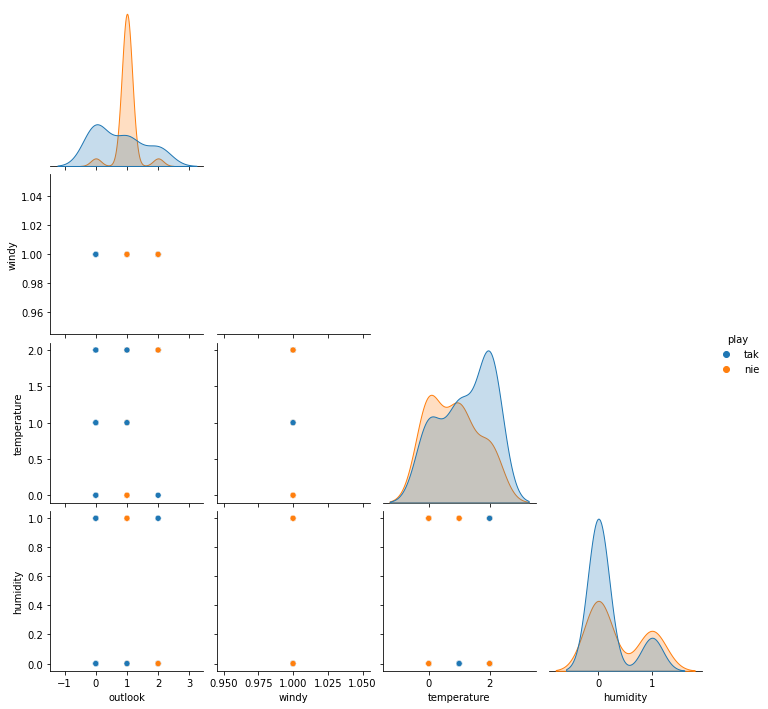

In [136]:
sns.pairplot(cat_data, vars=cat_data.columns[:-1], hue='play', corner=True)
plt.show()

In [78]:
train_set.loc[:, '0_cat':]

,0_cat,1_cat,2_cat,3_cat
0,2,1,0,0
1,1,1,1,1
2,2,1,2,1
3,1,1,2,0
4,1,1,1,0
5,0,1,1,0
6,0,1,1,0
7,1,1,1,0
8,0,1,0,1
9,1,1,0,0
